# ANLP : Sentiment Classification

We will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

In [131]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     Srivastav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Srivastav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Abhishek
[nltk_data]     Srivastav\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [132]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [133]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['no', ',', 'it', 'is', 'not', 'a', 'bad', 'film', ',', ...], 'pos')


In [134]:
training_data
pos_review_ids=movie_reviews.fileids('pos')
neg_review_ids=movie_reviews.fileids('neg')

#split positive and negative data into training and testing sets
pos_train_ids, pos_test_ids = split_data(pos_review_ids)
neg_train_ids, neg_test_ids = split_data(neg_review_ids)
[(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]

[(['bruce', 'willis', 'is', 'a', 'type', '-', 'casted', ...], 'pos'),
 (['i', 'don', "'", 't', 'know', 'what', 'movie', 'the', ...], 'pos'),
 (['plot', ':', 'good', 'ol', "'", 'texan', 'kid', ...], 'pos'),
 (['`', 'strange', 'days', "'", 'chronicles', 'the', ...], 'pos'),
 (['as', 'any', 'sociologist', 'will', 'attest', ',', ...], 'pos'),
 (['if', 'you', 'want', 'some', 'hearty', 'laughs', ',', ...], 'pos'),
 (['just', 'look', 'back', 'two', 'years', 'ago', 'at', ...], 'pos'),
 (['on', 'april', '12th', ',', '1912', ',', 'the', ...], 'pos'),
 (['if', 'he', 'doesn', '=', '92t', 'watch', 'out', ',', ...], 'pos'),
 (['it', 'is', 'often', 'said', 'by', 'his', 'fans', ...], 'pos'),
 (['one', 'of', 'the', 'best', 'movies', 'i', "'", 've', ...], 'pos'),
 (['since', 'most', 'movies', 'about', 'slavery', ...], 'pos'),
 (['billed', 'as', 'a', '"', 'feminist', 'sex', ...], 'pos'),
 (['note', ':', 'some', 'may', 'consider', 'portions', ...], 'pos'),
 (['scream', '2', ',', 'like', 'its', 'predecesso

In [322]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def normalise(wordlist):
    lowered=[word.lower() for word in wordlist] #don't actually need this as already lowered
    filtered=[word for word in lowered if word.isalpha() and word not in stop]
    return filtered

In [323]:
training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
testing_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]
training_norm[0]

(FreqDist({'event': 10, 'horizon': 10, 'film': 9, 'horror': 5, 'ship': 4, 'well': 4, 'actually': 3, 'many': 3, 'even': 3, 'alien': 3, ...}),
 'pos')

In [324]:
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist
        
pos_freq_dist

FreqDist({'film': 3609, 'one': 2133, 'movie': 1782, 'like': 1231, 'good': 882, 'also': 859, 'time': 849, 'story': 814, 'well': 810, 'even': 799, ...})

In [325]:
def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

In [338]:
#Answer 1a)
top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,10)
print("Below is list of 10 content words which are representative of the positive reviews:")
print(top_pos)

Below is list of 10 content words which are representative of the positive reviews:
['film', 'also', 'life', 'well', 'great', 'best', 'many', 'world', 'one', 'films']


In [339]:
#Answer 1b)
top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,10)
print("Below is list of 10 content words which are representative of the negative reviews:")
print(top_neg)

Below is list of 10 content words which are representative of the negative reviews:
['movie', 'bad', 'plot', 'even', 'worst', 'nothing', 'boring', 'get', 'stupid', 'supposed']


In [318]:
from nltk.classify.api import ClassifierI
import random

class SimpleClassifier(ClassifierI): 

    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, doc): 
        #doc is a FreqDist
        score = 0
        
        # add code here that assigns an appropriate value to score
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value
        
        return "neg" if score < 0 else "pos" 


    def labels(self): 
        return ("pos", "neg")

classifier = SimpleClassifier(top_pos, top_neg)    

In [331]:
#Answer 2a)
print("Sentimental analysis of the sentence <film was best> is : ")
classifier.classify(FreqDist("film was best".split()))


Sentimental analysis of the sentence <film was best> is : 


'pos'

In [332]:
#Answer 2a)
print("Sentimental analysis of the sentence <movie was bad> is : ")
classifier.classify(FreqDist("movie was bad".split()))

Sentimental analysis of the sentence <movie was bad> is : 


'neg'

In [23]:
#3a)
import random, math 
from nltk.corpus import stopwords
from nltk.classify.api import ClassifierI
from nltk.probability import FreqDist

stop = stopwords.words('english')
    
def classifier_evaluate(cls, test_data):
    '''
    cls: an instance of a classifier object which has a classify method which returns "pos" or "neg"
    test_data: a list of pairs where each pair is a FreqDist rep of a doc and its label
  
    returns: float point number which is the accuracy of the classifier on the test data provided 
    '''
    acc = 0
    docs,goldstandard=zip(*test_data) #note this neat pythonic way of turning a list of pairs into a pair of lists
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1
    
    return acc / (len(test_data))

class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        #self.predictions=predictions
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    
    def precision(self):
        p=0
        #put your code to compute precision here
        p = self.TP / (self.TP + self.FP)
    
        return p
  
    def recall(self):
        r=0
        #put your code to compute recall here
        r = self.TP / (self.TP + self.FN)
    
        return r
  
    def f1(self):
        f1=0
        #put your code to compute f1 here
        p=self.precision()
        r=self.recall()
        f1=2*p*r/(p+r)
        return f1 

In [340]:
accuracy=classifier_evaluate(classifier,testing_norm)
docs,labels=zip(*testing_norm)
senti_cm=ConfusionMatrix(classifier.classify_many(docs),labels)
print("The accuracy of the wordlist classifier is:",accuracy)
print("The precision of the wordlist classifier is:",senti_cm.precision())
print("The recall of the wordlist classifier is:",senti_cm.recall())
print("The F1 score of the wordlist classifier is:",senti_cm.f1())

The accuracy of the wordlist classifier is: 0.5983333333333334
The precision of the wordlist classifier is: 0.5603271983640081
The recall of the wordlist classifier is: 0.9133333333333333
The F1 score of the wordlist classifier is: 0.6945500633713562


In [108]:
from nltk.classify.api import ClassifierI

class NBClassifier(ClassifierI):
    
    def __init__(self):
        
        pass
    
    def _set_known_vocabulary(self,training_data):
        #add your code here
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)
    
    def _set_priors(self,training_data):
        #add your code here 
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors
        
    def _set_cond_probs(self,training_data):       
        #add your code here
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1
        
            conds[label]=classcond
    
        for label, classcond in conds.items():
            for word in self.known:
        
                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond
            
        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}
        
        self.conds=conds
    
    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)
    
    def classify(self,doc):
        #add your code here
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)

In [418]:
train_top_freqdict=[(FreqDist(top_pos),'pos')]+[(FreqDist(top_neg),'neg')]

In [417]:
#create an instance of an NBClassifier and apply it to the test data
myclassifier=NBClassifier()
myclassifier.train(train_top_freqdict)
myclassifier.classify_many(doc for (doc,label) in testing_norm)
accuracy=classifier_evaluate(myclassifier,testing_norm)
docs,labels=zip(*testing_norm)
senti_cm=ConfusionMatrix(myclassifier.classify_many(docs),labels)
print("The accuracy of the NBClassifier is:",accuracy)
print("The precision of the NBClassifier is:",senti_cm.precision())
print("The recall of the NBClassifier is:",senti_cm.recall())
print("The f1 score of the NBClassifier is:",senti_cm.f1())

The accuracy of the NBClassifier is: 0.67
The precision of the NBClassifier is: 0.6096997690531177
The recall of the NBClassifier is: 0.88
The f1 score of the NBClassifier is: 0.7203274215552523


Markdown and LaTeX:  𝛼2
    training_data

In [304]:
class SimpleClassifier_mf(SimpleClassifier):
    
    def __init__(self,k):
        self._k=k
    
    def train(self,training_data):
        
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist
                
        self._pos=most_frequent_words(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=most_frequent_words(neg_freq_dist,pos_freq_dist,self._k)

class SimpleClassifier_ot(SimpleClassifier):
    
    def __init__(self,k):
        self._k=k
    
    def train(self,training_data):
        
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist
                
        self._pos=above_threshold(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=above_threshold(neg_freq_dist,pos_freq_dist,self._k)

def above_threshold(posfreq,negfreq,threshold):
  difference=posfreq-negfreq
  sorteddiff=difference.most_common()
  filtered=[w for (w,f) in sorteddiff if f>threshold]
  return filtered

The accuracy of Word List MF classifier is 0.6666666666666666
The accuracy of Word List Thresh classifier is 0.535
The accuracy of Word List MF classifier is 0.6666666666666666
The accuracy of Word List Thresh classifier is 0.535
The accuracy of Word List MF classifier is 0.6666666666666666
The accuracy of Word List Thresh classifier is 0.535


,0,1
0,Word List MF,0.666667
1,Word List Thresh,0.535000


{2: {'Word List MF': 0.5161111111111111, 'Word List Thresh': 0.5},
 10: {'Word List MF': 0.5494444444444444, 'Word List Thresh': 0.5},
 50: {'Word List MF': 0.5977777777777777, 'Word List Thresh': 0.5},
 100: {'Word List MF': 0.6022222222222222, 'Word List Thresh': 0.52},
 150: {'Word List MF': 0.6038888888888889,
  'Word List Thresh': 0.5255555555555556},
 200: {'Word List MF': 0.7166666666666666,
  'Word List Thresh': 0.5633333333333332},
 225: {'Word List MF': 0.6016666666666667,
  'Word List Thresh': 0.5605555555555556},
 250: {'Word List MF': 0.6344444444444445,
  'Word List Thresh': 0.5622222222222222},
 275: {'Word List MF': 0.6066666666666666,
  'Word List Thresh': 0.5777777777777777},
 300: {'Word List MF': 0.6477777777777777,
  'Word List Thresh': 0.5894444444444444}}

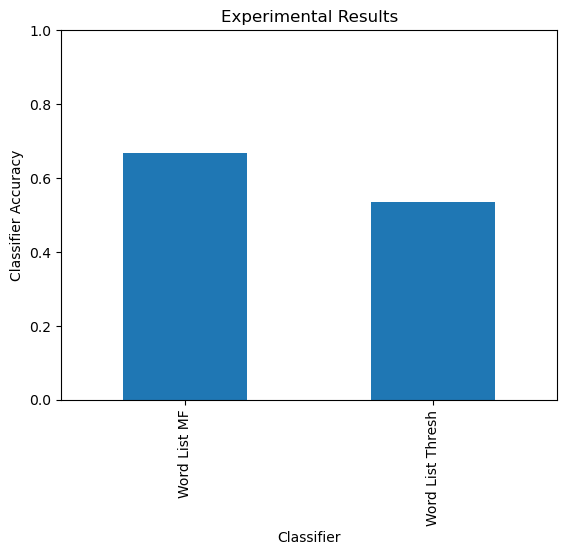

In [421]:
from random import sample

word_list_size = 100
threshold=100
classifiers={"Word List MF":SimpleClassifier_mf(word_list_size),
             "Word List Thresh":SimpleClassifier_ot(threshold)}

number_of_runs=3

results={}
for key in classifiers.keys():

    results[key]=0

for i in range(number_of_runs):
    for name,classifier in classifiers.items():
        classifier.train(training_norm)
        accuracy=classifier_evaluate(classifier,testing_norm)
        print("The accuracy of {} classifier is {}".format(name,accuracy))
        results[name]=results[name]+(accuracy/number_of_runs)
        
df = pd.DataFrame(list(results.items()))
display(df)
ax = df.plot.bar(title="Experimental Results",legend=False,x=0)
ax.set_ylabel("Classifier Accuracy")
ax.set_xlabel("Classifier")
ax.set_ylim(0,1.0)


sample_sizes=[2,10,50,100,150,200,225,250,275,300]
results={}

number_of_runs=3

for size in sample_sizes:
    res={}

    for i in range(number_of_runs):        
        positive_training=[(doc,label) for (doc,label) in training_norm if label=="pos"]
        negative_training=[(doc,label) for (doc,label) in training_norm if label=="neg"]
        training_sample=sample(positive_training,size)+sample(negative_training,size)
        
        for name,classifier in classifiers.items():
      
            classifier.train(training_sample)
            accuracy=classifier_evaluate(classifier,testing_norm)
            #print("The accuracy of {} classifier with training sample size {} is {}".format(name,size, accuracy))
            res[name]=res.get(name,0)+accuracy/number_of_runs
    results[size]=res

results


In [419]:
results

{2: {'Word List MF': 0.5094444444444445, 'Word List Thresh': 0.5},
 10: {'Word List MF': 0.5555555555555556, 'Word List Thresh': 0.5},
 50: {'Word List MF': 0.5888888888888889, 'Word List Thresh': 0.5},
 100: {'Word List MF': 0.6177777777777778, 'Word List Thresh': 0.5},
 150: {'Word List MF': 0.6505555555555556,
  'Word List Thresh': 0.5433333333333333},
 200: {'Word List MF': 0.6044444444444445,
  'Word List Thresh': 0.5572222222222222},
 225: {'Word List MF': 0.6305555555555555,
  'Word List Thresh': 0.5883333333333334},
 250: {'Word List MF': 0.6761111111111111,
  'Word List Thresh': 0.5794444444444444},
 275: {'Word List MF': 0.6088888888888889,
  'Word List Thresh': 0.5783333333333333},
 300: {'Word List MF': 0.6799999999999999,
  'Word List Thresh': 0.553888888888889}}

In [423]:
df=pd.DataFrame(results)
df=df.transpose()
df

,Word List MF,Word List Thresh
2,0.516111,0.500000
10,0.549444,0.500000
50,0.597778,0.500000
100,0.602222,0.520000
150,0.603889,0.525556
200,0.716667,0.563333
225,0.601667,0.560556
250,0.634444,0.562222
275,0.606667,0.577778
300,0.647778,0.589444


Text(0.5, 0, 'Sample Size')

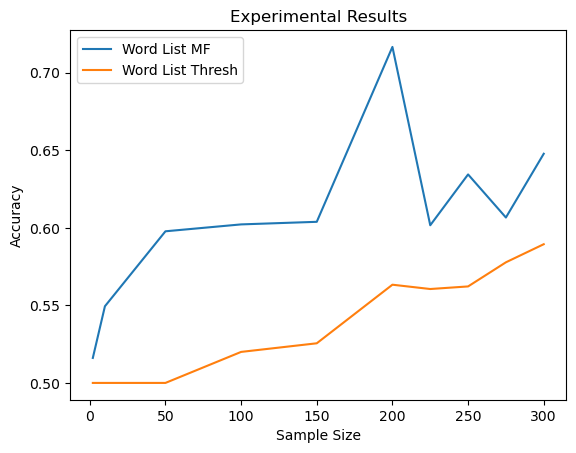

In [424]:
ax = df.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Sample Size")

From the above line graph , we can see that increasing the amount of training data generally seems to help up until a certain point (sample size around 150). After this point, performance even seems to go down. The wordlist classifier with most frequent words appears to outperform the wordlist classifier with above threshold words i.e 100 in this case.At around 150 sample size in above graph, there is a massive fluctuation in the results for the most frequent word classifier which is presumably caused by a certain word(s) being in or out of the list at this point (which is suggesting we are over-fitting the test set).